In [1]:
# Import needed modules

import alias

import numpy as np
import matplotlib.pyplot as plt
import random as rand

import scipy.stats

In [2]:
# Load files into dataset

with open('../data/sample_star_urls_rev2', 'r') as f:
    urls = f.read().splitlines()

files = [ '../data/spectra_rev2/%s' %url.split('/')[-1] for url in urls ]

ds = alias.loadDataset(files)

/mnt_home/jhand/alias/alias/__init__.py:58: RuntimeWarning: divide by zero encountered in power
  spec_ivar_parts = np.array(hdul[2].data)**-2
/home/jhand/.conda/envs/dev/lib/python3.11/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,
/home/jhand/.conda/envs/dev/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1217: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a, func=_nanmedian, keepdims=keepdims,


In [3]:
# Compute bulk statistical properties of dataset

median = np.nanmedian(ds.flux, axis=0)
residuals = ds.flux - median

/home/jhand/.conda/envs/dev/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1095: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


In [4]:
mad = scipy.stats.median_abs_deviation(residuals, axis=0, nan_policy='omit')

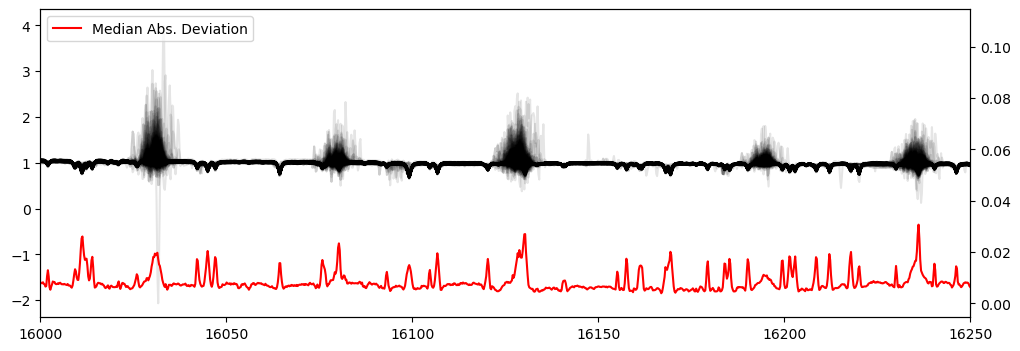

In [5]:
plt.figure(figsize=(12,4))

plt.plot(ds.wave, ds.flux.T, color='black', alpha=0.1)
plt.twinx().plot(ds.wave, mad, color='red', label='Median Abs. Deviation')
plt.legend(loc=2)
_ = plt.xlim(16000, 16250)

In [6]:
pl = np.nanpercentile(residuals, 5, axis=0)
ph = np.nanpercentile(residuals, 95, axis=0)
ipr = ph - pl

pl = np.nanpercentile(residuals, 1, axis=0)
ph = np.nanpercentile(residuals, 99, axis=0)
ipr2 = ph - pl

/home/jhand/.conda/envs/dev/lib/python3.11/site-packages/numpy/lib/nanfunctions.py:1577: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


In [7]:
def diff1and2(arr):
    sorted = np.sort(arr[~np.isnan(arr)])
    if len(sorted) < 2:
        return 0
    return sorted[-1] - sorted[-2]

diff = np.array([ diff1and2(i) for i in residuals.T ])

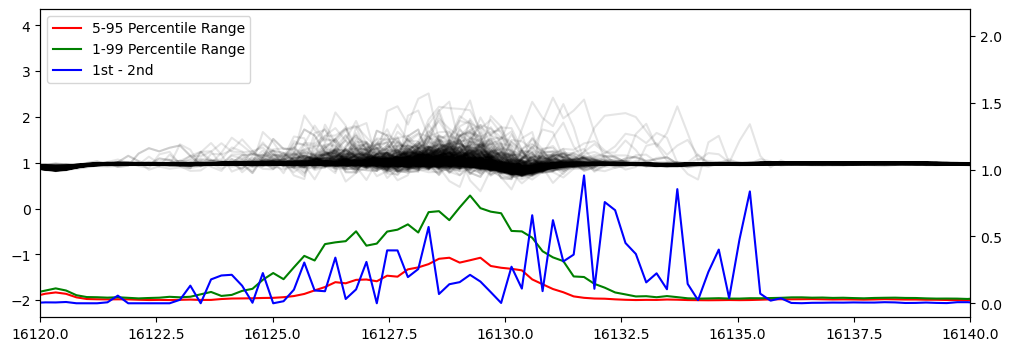

In [8]:
plt.figure(figsize=(12,4))

plt.plot(ds.wave, ds.flux.T, color='black', alpha=0.1)

plt.twinx().plot(ds.wave, ipr, color='red', label='5-95 Percentile Range')
plt.plot(ds.wave, ipr2, color='green', label='1-99 Percentile Range')
plt.plot(ds.wave, diff, color='blue', label='1st - 2nd')
plt.legend(loc=2)
_ = plt.xlim(16120, 16140)